In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
def load(data): # Loading the data from the excel
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13]) # Specification of the cells that have the values we need; raw data     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[-1]
    del mean2[0:4]
    return mean2

In [3]:
gain_reps = 11; concentration = []; col = []
arr_ = np.zeros((7, gain_reps))

for j in range(7):
    initial = 10 / 2**4
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)

for i in range(gain_reps):        
    a = 'C:\Clariostar\Writeup data\Clariostar data\Sulforhodamine 101 Gain '
    b = '.xlsx'
    gain = 50*i + 600
    c = a + str(gain) + b  
    
    col.append(gain)
    
    data_ = load(c)
    
    for x in range(len(data_)):
        arr_[x, i] = data_[x]


df = pd.DataFrame(arr_, index = concentration, columns = col)
print(df)

             600       650       700       750       800       850       900   \
0.625000  839.125  1095.250  1498.875  2097.875  2967.000  4214.875  5901.625   
0.312500  473.625   623.875   834.250  1106.625  1478.625  1974.750  2629.625   
0.156250  261.625   344.125   479.125   636.250   854.500  1139.625  1504.625   
0.078125  142.875   193.375   262.125   350.500   471.750   640.375   843.625   
0.039062   74.750   101.750   148.875   196.750   255.250   341.875   453.750   
0.019531   45.750    62.500    91.125   112.375   158.250   202.625   269.125   
0.009766   25.000    36.250    53.750    64.750    87.000   114.500   154.500   

              950        1000       1050       1100  
0.625000  8708.500  11258.625  16426.750  20400.375  
0.312500  3485.250   4695.250   6233.500   8181.750  
0.156250  2033.625   2660.500   3504.125   4612.125  
0.078125  1126.250   1498.125   1943.000   2595.750  
0.039062   578.000    793.625   1061.625   1421.125  
0.019531   355.000    476.6

0.9966233441922738
0.999919395102191
0.9999545316614267
0.9998941752140973
0.9996783061383402
0.9997755242356001
0.9984900323348715


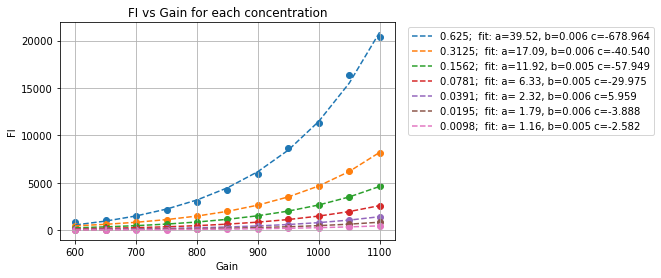

0.005585652071252763


In [4]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []
popt5_blist = []
popt5_clist = []

for i in range(df.shape[0]):
    x1 = df.columns
    y1 = df.iloc[i, :]

    plt.scatter(x1, y1)
    
    
    popt5, pcov5 = curve_fit(func, x1, y1, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_blist.append(popt5[1])
    popt5_clist.append(popt5[2])
   

    plt.plot(x1, func(x1, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))

    residuals = y1 - func(x1, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y1 - np.mean(y1))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)    

plt.title("FI vs Gain for each concentration")
plt.xlabel('Gain')
plt.ylabel('FI')

plt.grid()
plt.legend(bbox_to_anchor = (1.025, 1), loc = 2)
plt.show()

bmean = np.mean(popt5_blist)
print(bmean)

[[  5.4640993  -28.41833377]
 [  4.73290705 -24.25353336]
 [  4.76281975 -25.0192093 ]
 [  4.79469452 -25.82086943]
 [  4.79409789 -26.43543233]
 [  4.75572035 -26.68550338]
 [  4.67985222 -26.75344615]] 
 (7, 2)


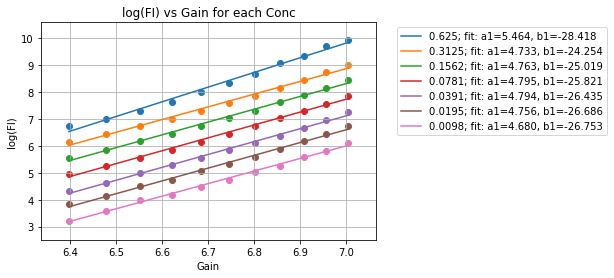

In [5]:
fit_array = np.zeros((0, 2))

for i in range(df.shape[0]):
    x1 = np.log(np.array(df.columns))
    y1 = np.log(np.array(df.iloc[i,:]))
    
    fit1 = np.polyfit(x1, y1, 1)
    fit1_list = [fit1]
    a1 = fit1[0]
    b1 = fit1[1]
    fit_equation = a1 * x1 + b1
    
    fit_array = np.append(fit_array, fit1_list, axis = 0)
    
    plt.scatter(x1, y1)
    plt.plot(x1, fit_equation, label = str(round(initial * 0.5**i, 4)) + '; fit: a1=%5.3f, b1=%5.3f' % tuple(fit1))

print(fit_array, "\n", fit_array.shape)


plt.title("log(FI) vs Gain for each Conc")
plt.xlabel("Gain")
# plt.xticks(x, col)
plt.ylabel("log(FI)")
# plt.legend(df.index, bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.grid()
plt.margins(0.10) 

plt.show()

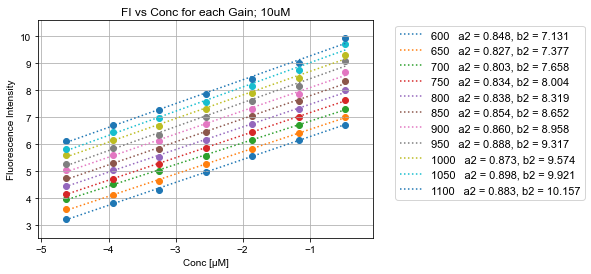

0.8551011261388126


In [15]:
fit2_array = np.zeros((0,2)); a2_list = []; b2_list = []
for i in range(df.shape[1]): 
    x2 = np.log(df.index)
    y2 = np.log(np.array(df.iloc[:, i]))   
    
    fit2 = np.polyfit(x2, y2, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    a2 = fit2[0]
    b2 = fit2[1]
    fit2_equation = a2 * x2 + b2
    fit2_list = [fit2]
    
    fit2_array = np.append(fit2_array, fit2_list, axis = 0)
    a2_list.append(a2); b2_list.append(b2)
    
    plt.scatter(x2, y2)
    plt.plot(x2, fit2_equation, ':', label = str(50*i + 600) + '   a2 = %5.3f, b2 = %5.3f' % tuple(fit2))
    
    
plt.title('FI vs Conc for each Gain; 10uM')
plt.xlabel('Conc [µM]')
plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)

plt.grid(); plt.margins(0.10) 
plt.show()
# print(fit2_array)

a2_array = np.array(a2_list)
a2_mean = np.mean(a2_array)
print(a2_mean)

53.26853543398836 0.0056550850303545355 -613.6347607406701 
 
 0.9983289055406024


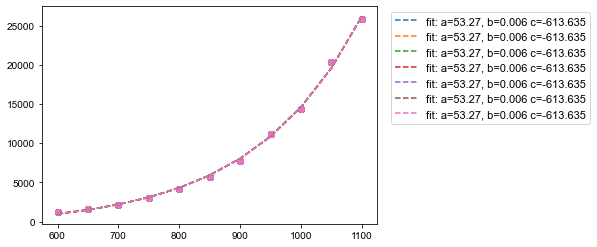

In [14]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c


for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b2_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

plt.legend(bbox_to_anchor=(1.025, 1))
    

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print(*popt9, '\n','\n', r_squared1_1)

                600         650          700          750          800   \
0.625000  649.949832  996.499186  1456.293614  2066.339237  2875.734999   
0.312500  359.309540  550.891232   805.077810  1142.327243  1589.782730   
0.156250  198.635862  304.547313   445.068408   631.508857   878.874141   
0.078125  109.811183  168.361848   246.045644   349.114878   485.864981   
0.039062   60.706540   93.074904   136.020570   192.999982   268.599073   
0.019531   33.560189   51.454280    75.195786   106.695519   148.488706   
0.009766   18.552964   28.445293    41.570229    58.984118    82.088503   

                 850          900          950          1000          1050  \
0.625000  3949.624355  5374.438273  7264.851555  9773.012327  13100.787539   
0.312500  2183.457304  2971.132302  4016.203001  5402.780930   7242.463502   
0.156250  1207.073222  1642.520894  2220.263749  2986.800876   4003.826290   
0.078125   667.302155   908.029200  1227.420803  1651.182898   2213.421574   
0.039062 

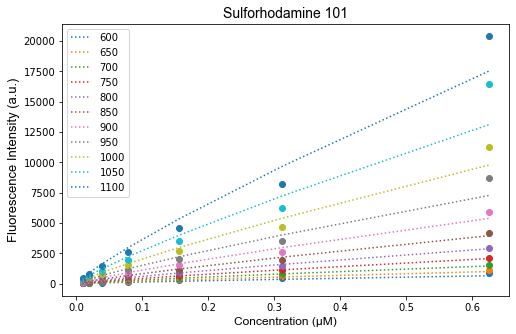

In [10]:
model = list(df.index)
model = np.array(model, dtype = float); model_array = []; index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 600
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a2_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 600
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, ':', label = '%2.0f' % gain)

plt.title('Sulforhodamine 101', fontsize=14, fontname='Arial'); plt.xlabel('Concentration (\u03BCM)', fontsize=12, fontname='Arial'); plt.ylabel('Fluorescence Intensity (a.u.)', fontsize=13, fontname='Arial')
plt.grid(False); plt.legend(loc="upper left") 
params = {'legend.fontsize': 11, 'legend.handlelength': 2}; plt.rcParams["font.family"] = "Arial"; plt.rcParams.update(params)

#plt.savefig('Claristar Sulforhodamine 101.png', dpi=300)

plt.show()

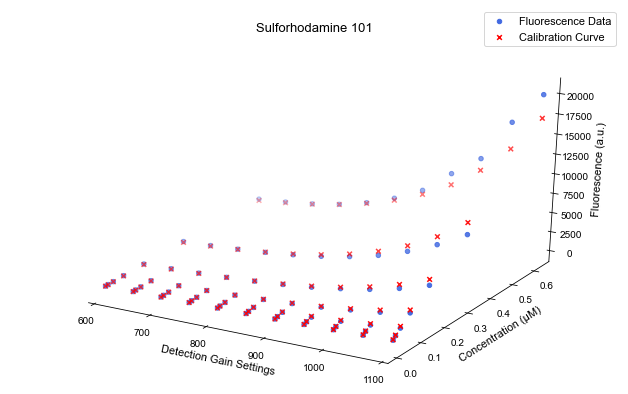

In [13]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='royalblue', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='r', marker='x')

ax.set_title('Sulforhodamine 101', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5)
ax.grid(False)
ax.set_xlim(600,1100)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

#plt.savefig('Claristar Sulforhodamine 101 3D.png', dpi=300)

plt.show()

In [ ]:
for i in range(df.shape[1]): 
    x2 = df.index
    y2 = np.array(df.iloc[:, i])   
    
    plt.scatter(np.log(x2), np.log(y2)) 
    plt.plot(np.log(x2), np.log(y2), ':', label = str(50*i + 600))

plt.title('log(FI) vs log(Concentration) for each Gain; 10uM'); plt.xlabel('log(Conc)'); plt.ylabel('log(FI)')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
    
plt.show()